## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


### Find no.of samples are there in training and test datasets

In [3]:
print("No. of samples in the training set:", x_train.shape[0])
print("No. of samples in the training set:", y_train.shape[0])
print("No. of samples in the test set:", x_test.shape[0])
print("No. of samples in the test set:", y_test.shape[0])


No. of samples in the training set: 60000
No. of samples in the training set: 60000
No. of samples in the test set: 10000
No. of samples in the test set: 10000


In [4]:
""

''

### Find dimensions of an image in the dataset

In [5]:
print("Dimensions of an image:", x_train[0].shape)

Dimensions of an image: (28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [6]:
import pandas as pd
df = pd.DataFrame(y_train)
num_classes=len(df[0].unique())
print("Number of classes : ", num_classes)
#pd.crosstab(y_train, columns='0')

Number of classes :  10


In [0]:
from keras.utils import np_utils

Y_train=np_utils.to_categorical(y_train,num_classes)
Y_test=np_utils.to_categorical(y_test,num_classes)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
X_train=x_train/255
X_test=x_test/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype('float32')

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [11]:
import keras
epoch=10
model = Sequential()
model.add(Conv2D(32,(3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3), activation="relu"))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(monitor="val_acc", patience=5, verbose=1, mode="auto")
callback_list = [early_stopping]
model.fit(X_train, Y_train, batch_size=32, nb_epoch=epoch, validation_data=(X_test,Y_test), callbacks=callback_list)


W0728 13:06:59.080081 140176324917120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0728 13:06:59.117031 140176324917120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 13:06:59.124598 140176324917120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0728 13:06:59.195936 140176324917120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0728 13:06:59.219694 140176324917120 deprecation_wrappe

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 289us/step - loss: 0.3837 - acc: 0.8618 - val_loss: 0.3110 - val_acc: 0.8877
Epoch 2/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.2390 - acc: 0.9115 - val_loss: 0.2758 - val_acc: 0.8972
Epoch 3/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.1727 - acc: 0.9363 - val_loss: 0.2521 - val_acc: 0.9109
Epoch 4/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.1216 - acc: 0.9546 - val_loss: 0.2824 - val_acc: 0.9109
Epoch 5/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.0819 - acc: 0.9697 - val_loss: 0.3026 - val_acc: 0.9153
Epoch 6/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.0563 - acc: 0.9790 - val_loss: 0.3391 - val_acc: 0.9131
Epoch 7/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.0413 - acc: 0.9853 - val_loss: 0.

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [12]:

model = Sequential()
model.add(Conv2D(32,(3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(monitor="val_acc", patience=5, verbose=1, mode="auto")
callback_list = [early_stopping]
model.fit(X_train, Y_train, batch_size=64, nb_epoch=10, validation_data=(X_test,Y_test), callbacks=callback_list)

W0728 13:08:52.691972 140176324917120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0728 13:08:52.702113 140176324917120 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.4312 - acc: 0.8452 - val_loss: 0.3251 - val_acc: 0.8814
Epoch 2/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.2783 - acc: 0.8993 - val_loss: 0.2628 - val_acc: 0.9055
Epoch 3/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.2317 - acc: 0.9142 - val_loss: 0.2557 - val_acc: 0.9063
Epoch 4/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.1982 - acc: 0.9262 - val_loss: 0.2309 - val_acc: 0.9144
Epoch 5/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.1702 - acc: 0.9369 - val_loss: 0.2198 - val_acc: 0.9225
Epoch 6/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.1459 - acc: 0.9445 - val_loss: 0.2326 - val_acc: 0.9159
Epoch 7/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.1255 - acc: 0.9534 - val_loss: 0.2284 - val_acc

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(X_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

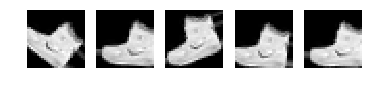

In [14]:
from matplotlib import pyplot as plt
gen = datagen.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [15]:


model.fit_generator(datagen.flow(X_train, Y_train,
                    batch_size=32),
                    samples_per_epoch=X_train.shape[0],
                    nb_epoch=10,
                    validation_data=(X_test, Y_test), callbacks=callback_list)

Epoch 1/10
  13/1875 [..............................] - ETA: 19s - loss: 2.2712 - acc: 0.4399

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  import sys


1875/1875 [==============================] - 19s 10ms/step - loss: 0.6774 - acc: 0.7504 - val_loss: 0.3454 - val_acc: 0.8787
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5191 - acc: 0.8056 - val_loss: 0.3887 - val_acc: 0.8587
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4674 - acc: 0.8246 - val_loss: 0.3418 - val_acc: 0.8751
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4389 - acc: 0.8364 - val_loss: 0.3469 - val_acc: 0.8755
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4209 - acc: 0.8447 - val_loss: 0.3272 - val_acc: 0.8822
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4023 - acc: 0.8507 - val_loss: 0.3036 - val_acc: 0.8911
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3954 - acc: 0.8539 - val_loss: 0.3211 - val_acc: 0.8880
Epoch 8/10
1875/1875 [==============================] - 18s

###  Report the final train and validation accuracy

After adding max pooling, dropout and data augmentation,  the model has given good result for both train and test accuracy.

Without augmentation, loss: 0.0800 - acc: 0.9694 - val_loss: 0.2604 - val_acc: 0.9200

With augmentation, loss: 0.3648 - acc: 0.8655 - val_loss: 0.3143 - val_acc: 0.8910



In [16]:
score=model.evaluate(X_test,Y_test)

score


10000/10000 [==============================] - 1s 55us/step


[0.31425105699300765, 0.891]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [18]:
from keras.datasets import cifar10
(cix_train, ciy_train), (cix_test, ciy_test) = cifar10.load_data()
cix_train[1].shape

170500096/170498071 [==============================] - 2s 0us/step


(32, 32, 3)

In [0]:

ciX_train=cix_train.reshape(cix_train.shape[0],32,32,3).astype('float32')
ciX_test=cix_test.reshape(cix_test.shape[0],32,32,3).astype('float32')

ciX_train/=255
ciX_test/=255


In [0]:
#Encoding the output in onehot encoding
ciY_train = np_utils.to_categorical(ciy_train, 10)
ciY_test = np_utils.to_categorical(ciy_test, 10)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

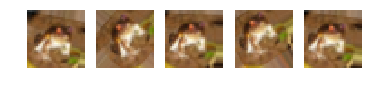

In [21]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(ciX_train)

from matplotlib import pyplot as plt
gen = datagen.flow(ciX_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()

### **Prepare/fit the generator.**

In [22]:
cimodel = Sequential()
cimodel.add(Conv2D(64,(3,3),border_mode="valid", input_shape=(32,32,3), activation="relu"))
cimodel.add(Conv2D(128,(3,3),border_mode="valid", input_shape=(32,32,3), activation="relu"))
cimodel.add(Flatten())
cimodel.add(Dense(128,activation="relu"))
cimodel.add(Dense(128,activation="relu"))
cimodel.add(Dense(10,activation="softmax"))

cimodel.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
early_stopping = keras.callbacks.EarlyStopping(monitor="val_acc", patience=10, verbose=1, mode="auto")
callback_list = [early_stopping]
#model.fit(X_train,Y_train,batch_size=Batch_size,epochs=epoch, validation_data=(X_test, Y_test), callbacks=callback_list)


cimodel.fit_generator(datagen.flow(ciX_train, ciY_train,
                    batch_size=32),
                    samples_per_epoch=ciX_train.shape[0],
                    nb_epoch=20,
                    validation_data=(ciX_test, ciY_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="valid")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="valid")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/d

Epoch 1/20
1562/1562 [==============================] - 31s 20ms/step - loss: 1.7361 - acc: 0.3740 - val_loss: 1.4261 - val_acc: 0.4778
Epoch 2/20
1562/1562 [==============================] - 30s 19ms/step - loss: 1.5104 - acc: 0.4534 - val_loss: 1.3281 - val_acc: 0.5199
Epoch 3/20
1562/1562 [==============================] - 30s 19ms/step - loss: 1.4080 - acc: 0.4922 - val_loss: 1.2545 - val_acc: 0.5490
Epoch 4/20
1562/1562 [==============================] - 30s 19ms/step - loss: 1.3450 - acc: 0.5193 - val_loss: 1.2672 - val_acc: 0.5428
Epoch 5/20
1562/1562 [==============================] - 30s 19ms/step - loss: 1.3071 - acc: 0.5321 - val_loss: 1.1647 - val_acc: 0.5859
Epoch 6/20
1562/1562 [==============================] - 30s 19ms/step - loss: 1.2662 - acc: 0.5483 - val_loss: 1.2446 - val_acc: 0.5597
Epoch 7/20
1562/1562 [==============================] - 30s 19ms/step - loss: 1.2381 - acc: 0.5578 - val_loss: 1.1655 - val_acc: 0.5891
Epoch 8/20
1562/1562 [==========================

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

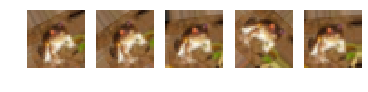

In [26]:
from matplotlib import pyplot as plt
gen = datagen.flow(ciX_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()